In [1]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy

Antes de construirmos um modelo propriamente dito, vamos dar uma olhada nos tipos de acordes que encontramos em nosso corpus. 

Para obtermos o tipo de um acorde, basta pegar sua forma completa e remover a tônica. Por exemplo, para acessar o tipo do acorde Bbmin7, removemos a nota Bb (tônica) e, portanto, ele é do tipo menor com sétima (min7).

Obs.: se o acorde tiver um baixo diferente da tônica (ex.: Amin7/G), isso não afeta seu tipo. Nesse caso, removemos o baixo.

In [2]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

notes_reverse = copy.deepcopy(notes)
notes_reverse.reverse()

In [3]:
chord_types = []
for file in os.listdir('../corpus/chords_sequences'):
    
    song = file.split('.csv')[0]
    df = pd.read_csv('../corpus/chords_sequences/'+file)

    for i in df.index:
        chord = df.iloc[i][song]
        chord = chord.split('/')[0]

        note = df.iloc[i]['chord_note']

        chord_type = chord.replace(note, '')
        chord_types.append(chord_type)

In [4]:
df_types = pd.DataFrame(Counter(chord_types).most_common(45))
df_types.rename(columns={0:'chord_type', 1:'freq'}, inplace=True)
df_types

,chord_type,freq
0,7,4449
1,min7,3094
2,maj7,1136
3,,1044
4,9,592
5,13,414
6,7(#9),267
7,min,209
8,min11,110
9,min9,99


Vamos construir um modelo inicial de classificação. Primeiro, consideraremos apenas (i) acordes maiores com sétima e (ii) acordes menores com sétima. Isso porque estes dois tipos são os mais frequentes em nosso corpus, como vemos acima.

In [5]:
def get_chord_type(chord, 
                   chord_note):
    
    chord = chord.split('/')[0]
    chord_type = chord.replace(chord_note, '')
    
    return chord_type


In [6]:
# test = pd.read_csv('../corpus/chords_and_chromas/{}.csv'.format('SomethingElse'))
# test

In [7]:
# test['chord_type'] = test.apply(lambda x:get_chord_type(x['SomethingElse'], 
#                                                         x['chord_note']), 
#                                 axis=1)
# test

In [8]:
# df_input_output = test[(test.chord_type == '7') | (test.chord_type == 'min7')]
# df_input_output = df_input_output[notes + ['chord_type', 'chord_note']]

In [9]:
# df_model = pd.DataFrame(columns=notes + ['chord_type', 'chord_note'])
# df_model = df_model.append(df_input_output)
# df_model

In [14]:
folder = '../corpus/chords_and_chromas/'
df_model = pd.DataFrame(columns=notes + ['chord_type', 'chord_note'])
songs_with_errors = []

for file in os.listdir(folder):
    
    song = file.split('.csv')[0]
    df = pd.read_csv(folder + '/' + file)
    
#     test = pd.read_csv('../corpus/chords_and_chromas/{}.csv'.format(song))
    
#     print(song)
    try:
        df['chord_type'] = df.apply(lambda x:get_chord_type(x[song],
                                                            x['chord_note']),
                                    axis=1)

        # renomeando para usar apenas bemóis em vez de sustenidos
        notes_old = list(df.columns[5:-1])
        
        df.rename(columns=dict(zip(notes_old, notes)), inplace=True)
        df_input_output = df.copy()#df[(df.chord_type == '7') | (df.chord_type == 'min7')]
        df_input_output = df_input_output[notes + ['chord_type', 'chord_note']]

        df_model = df_model.append(df_input_output)
        print(song)
        
    except Exception as e:
#         print(str(e))
        songs_with_errors.append(song)

BlueBossa
For Mods Only
Soulville
MamboInn
Whilemyladysleeps
Theme
SoulStation
lhcd
MelodyForC
IsYouIsOrIsYouAintMyBaby
BeautifulLove
Root Down
MysticBrew
Cold duck Lead
Clouds
Midnight Blue
LullabyOfTheLeaves
Jazz Crimes
Dumaine St
gonehomeC#
728
HeadinHome
Lotus Blossom
Groovin'
dat dere
Cat, TheEb
AppointmentInGhana
Cinnamon and Clove
psychedelic sally C
Tune 88
Cariba
Somethin' Special
Spiral
Liberia
Bluesinthebasement
Brother Ray
Mean GreansII
WithoutYou
Isn't She Lovely
chicken
TheOddCouple
feellike
filthy mcnasty
BluesMarch
Moonglow
OnTheSunnySideOfTheStreet
Sham Time
OnTheSunnySideOfTheStreet_II
SweetEmma
FairWeather
Montara
Seventeen West
BluesInH
Cantaloupe Island
News For Lulu
SoulStreet
Cousin Mary
Twistin'
StrasbourgII
Bemsha Swing
Jean De Fleur
AlwaysThere
YardbirdSuite
Saint James
SoulfulStrut
Somethin Else
WineLight
Outro_Transcription
GrazingInTheGrassII
Velocity
ImNotSoSure
UmmhC
JigAJugC
peopleMake
A smooth One
betty1
CapeVerdeanBlues
Comin' Home Baby
ItAintNec(Green

In [15]:
len(songs_with_errors)

48

### Enarmonia

Trocando todo sustenido para bemol:

In [16]:
notes_letters = ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']

def sustenido_to_bemol(note):
    
    if '#' in note:
        note = note[0]
        ind_note = notes_letters.index(note)
        ind_new = ind_note+1
        
        note_out = notes_letters[ind_new] + 'b'
        
    else:
        note_out = note
        
    return note_out

In [17]:
df_model['chord_note'] = df_model['chord_note'].map(sustenido_to_bemol)

Futriquei as músicas que deram erro com esse código... Descobri que elas não têm a harmonia na partitura :(

Meio que não tem o que fazer, não podemos usá-las.

In [18]:
df_model.reset_index(inplace=True)
df_model = df_model[notes + ['chord_type', 'chord_note']]
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,chord_type,chord_note
0,2424.775146,649.566223,1520.075562,4838.859863,1459.136108,431.326782,1520.336792,10194.058594,1768.753784,555.698059,2760.980469,1127.436768,min7,C
1,202.100693,59.212749,80.699181,345.798828,156.593384,121.043465,48.564289,285.695953,1627.287109,376.062347,546.617798,115.770874,min7,F
2,116.763466,73.307884,238.934494,309.286407,182.990219,640.918945,156.761169,73.817390,170.756058,142.257919,191.084839,56.497860,7,Bb
3,171.673050,92.634277,233.966019,98.413017,153.691757,619.591125,148.781067,33.686485,68.410393,152.700363,43.859909,34.778751,min7(b5),D
4,150.296402,75.221359,181.012436,101.307930,144.853592,627.180969,213.095596,149.419434,53.021454,359.561646,2102.394775,484.215302,7(#5),G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11417,431.617310,1805.952026,461.410614,618.788147,2819.308350,885.240479,337.873810,1640.655640,906.323792,1654.903442,328.899048,263.448303,7,A
11418,183.529907,343.090912,1057.369141,339.564697,720.431458,3041.278564,1053.232544,1655.763306,403.306732,752.009766,1929.288452,366.078857,min7,G
11419,2098.303955,485.935883,688.101013,3313.101318,1701.130859,1659.018677,336.857178,393.356659,525.475220,1692.492065,431.507843,483.834198,7,F
11420,444.958344,457.386597,2639.313721,1161.251099,3515.414795,704.844177,359.951813,1550.976929,378.730927,186.420609,331.588348,2006.668091,min7,E


In [19]:
df_model['chord_note'].value_counts()

C     1503
F     1417
G     1345
Bb    1342
D     1036
Eb    1021
A      767
Ab     758
E      749
Db     538
B      487
Gb     459
Name: chord_note, dtype: int64

Flavio: 

(i) normalizar dividindo pelo máximo cada vetor e depois pra matriz inteira;

(ii) scatter em que cada ponto é um acorde, um dos eixos é a tônica e o outro a nota de maior valor do chroma.

(iii) voltar pra geração do corpus, v

In [20]:
func_max = lambda x: np.where(x==x.max())[0][0] + 1

In [21]:
notes#.replace('C#','Db')

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

In [22]:
df_model['note_number'] = df_model['chord_note'].map(dict(zip(notes, range(1,13))))

for i in df_model.index:
    chroma_max = df_model.loc[i][notes].max()
    df_model.at[i, notes] = (df_model.loc[i][notes]/chroma_max).values
#     df.at['C', 'x'] = 10

In [23]:
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,chord_type,chord_note,note_number
0,0.237862,0.063720,0.149114,0.474675,0.143136,0.042312,0.149139,1.000000,0.173508,0.054512,0.270842,0.110597,min7,C,1
1,0.124195,0.036387,0.049591,0.212500,0.096230,0.074384,0.029844,0.175566,1.000000,0.231098,0.335907,0.071143,min7,F,6
2,0.182181,0.114379,0.372800,0.482567,0.285512,1.000000,0.244588,0.115174,0.266424,0.221959,0.298142,0.088151,7,Bb,11
3,0.277075,0.149509,0.377614,0.158835,0.248054,1.000000,0.240128,0.054369,0.110412,0.246453,0.070788,0.056132,min7(b5),D,3
4,0.071488,0.035779,0.086098,0.048187,0.068899,0.298317,0.101359,0.071071,0.025220,0.171025,1.000000,0.230316,7(#5),G,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11417,0.153093,0.640566,0.163661,0.219482,1.000000,0.313992,0.119843,0.581936,0.321470,0.586989,0.116659,0.093444,7,A,10
11418,0.060346,0.112811,0.347673,0.111652,0.236884,1.000000,0.346312,0.544430,0.132611,0.247268,0.634368,0.120370,min7,G,8
11419,0.633335,0.146671,0.207691,1.000000,0.513456,0.500745,0.101674,0.118728,0.158605,0.510848,0.130243,0.146037,7,F,6
11420,0.126573,0.130109,0.750783,0.330331,1.000000,0.200501,0.102392,0.441193,0.107734,0.053029,0.094324,0.570820,min7,E,5


Vamos analisar os chromas máximos mais frequentes em nosso corpus, separadamente por cada tipo de acorde:

<ipython-input-60-c9e475533cdf>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,12))


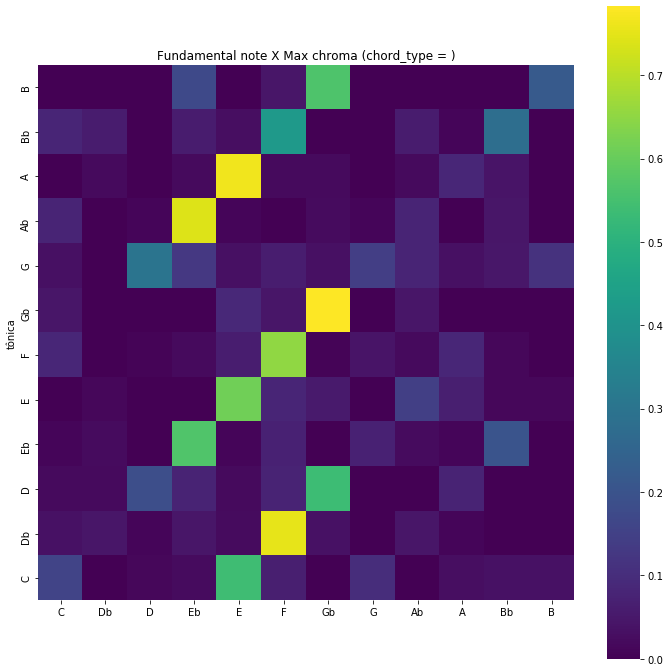

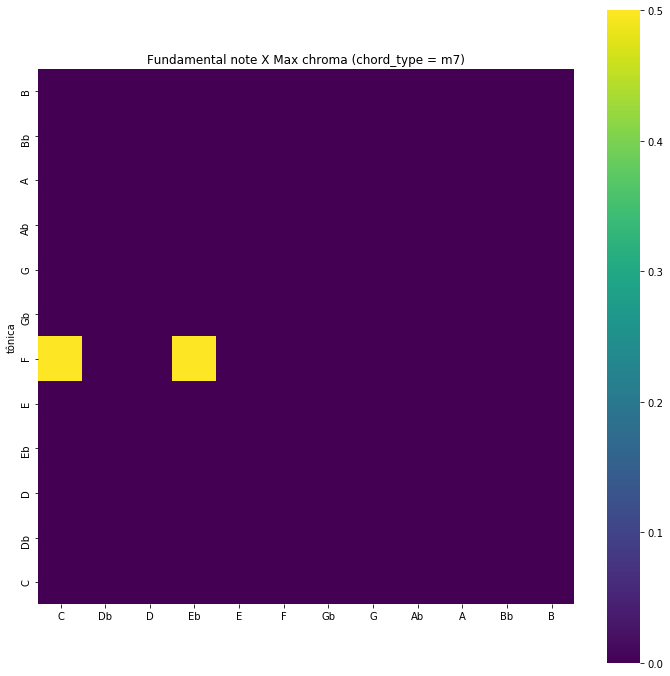

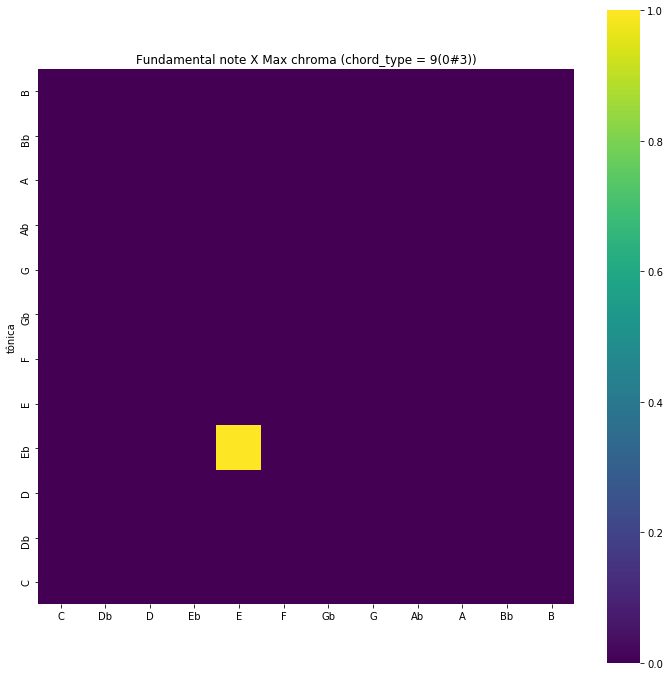

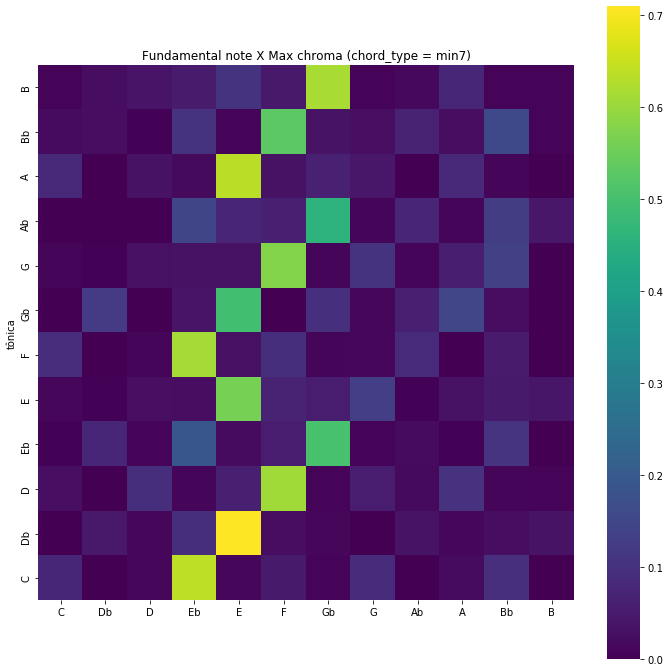

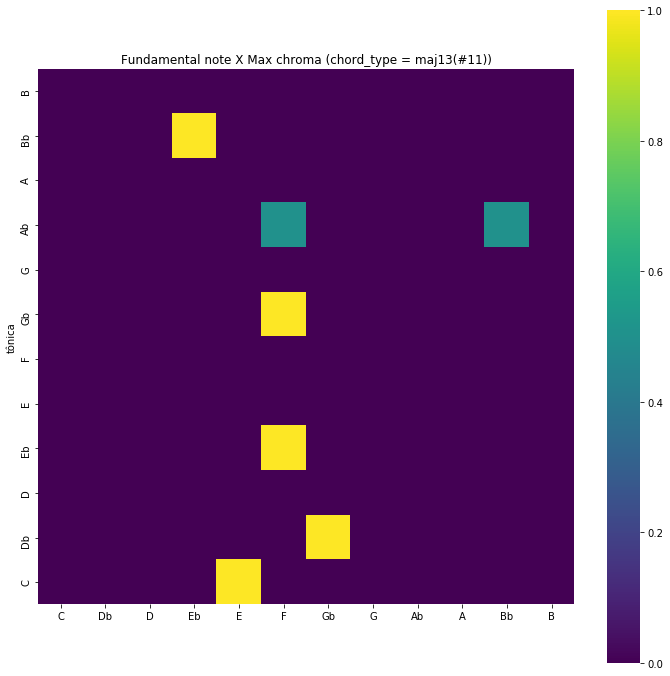

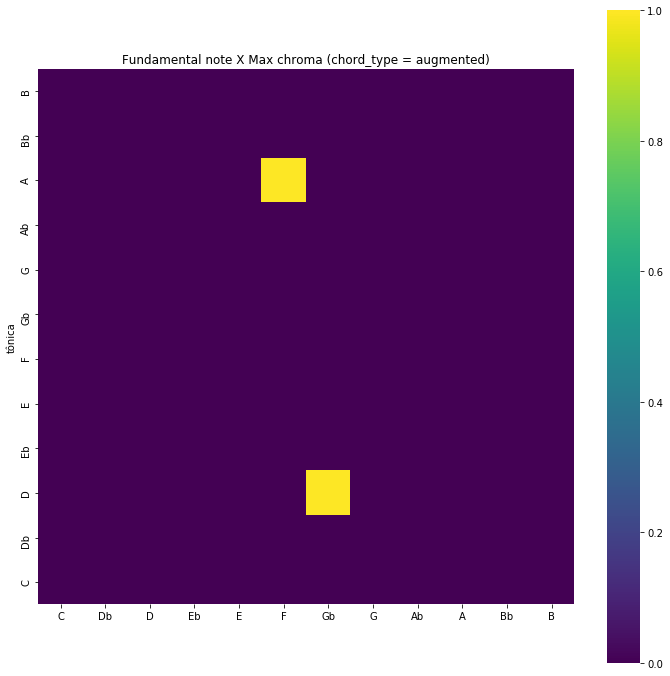

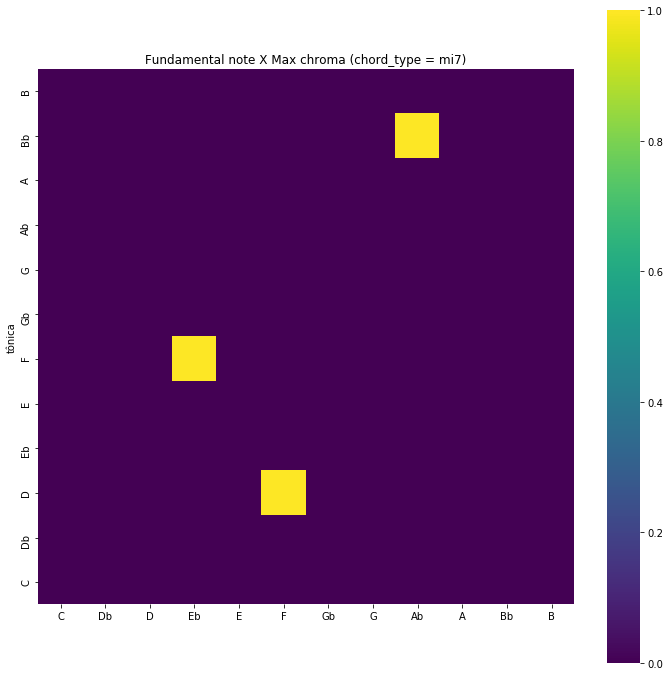

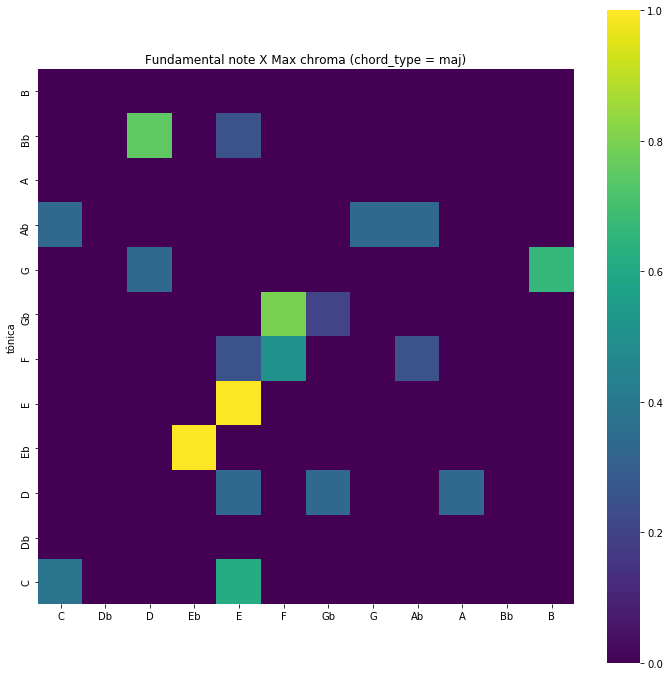

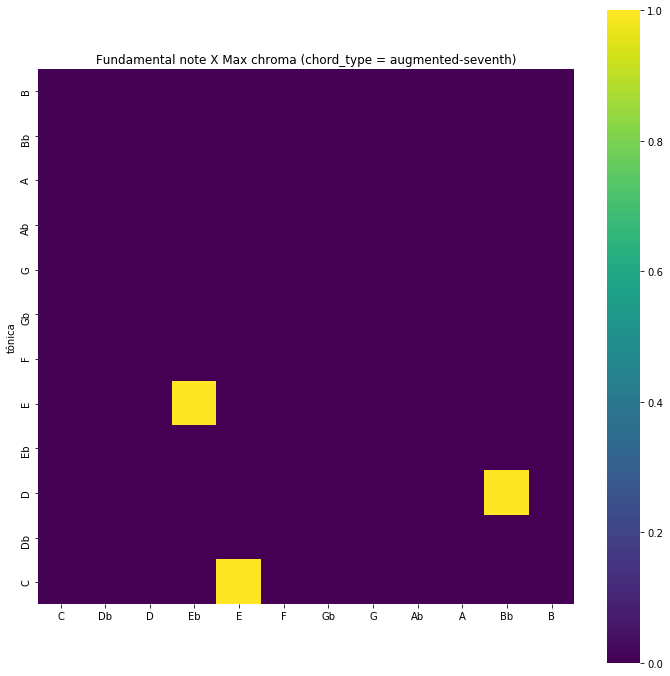

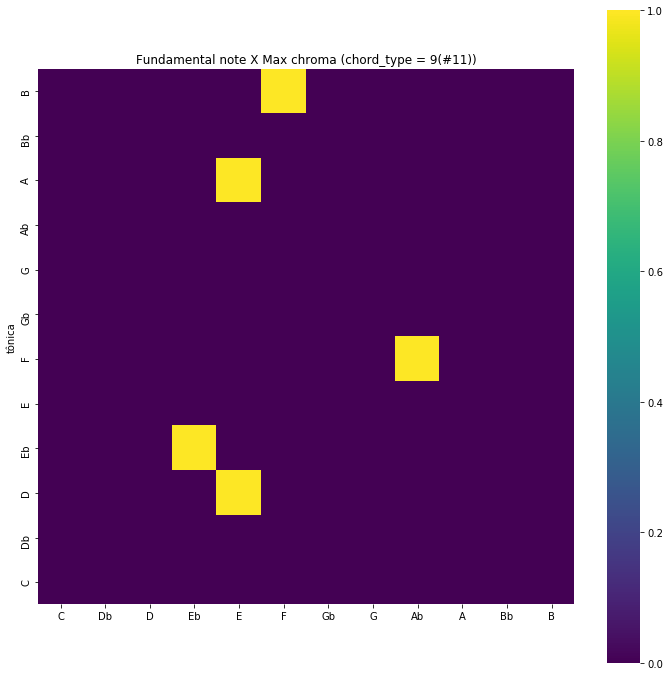

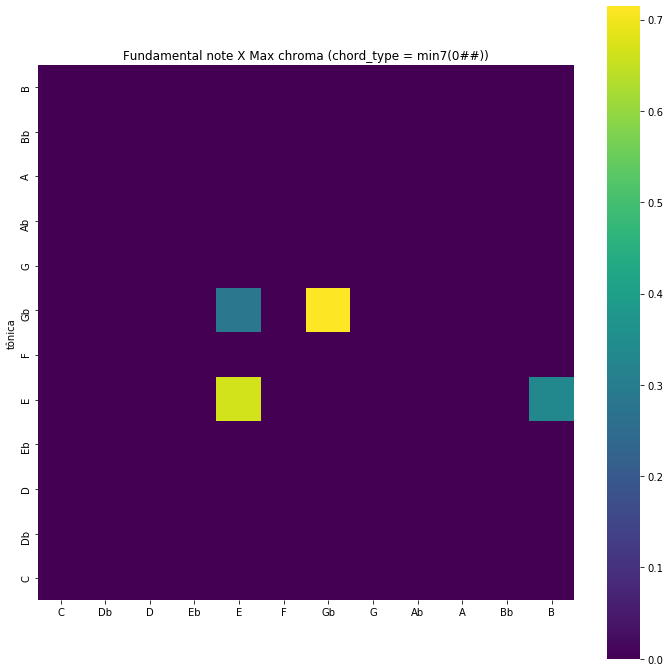

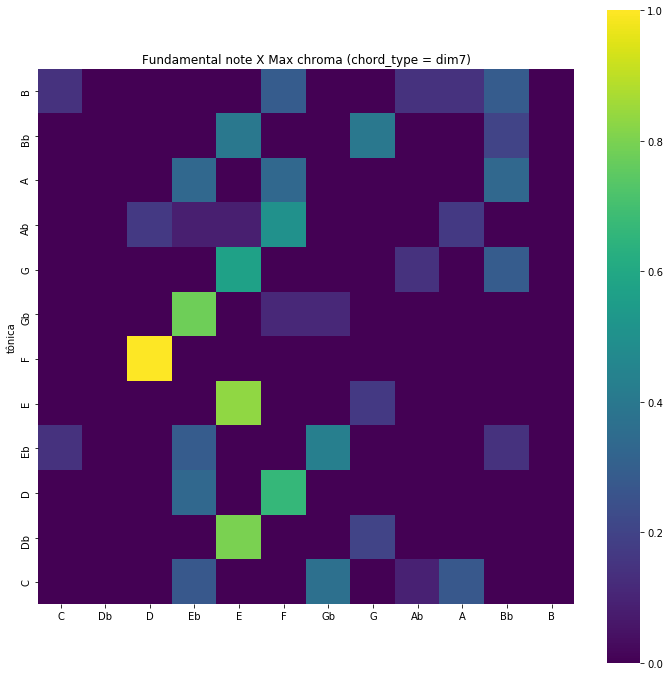

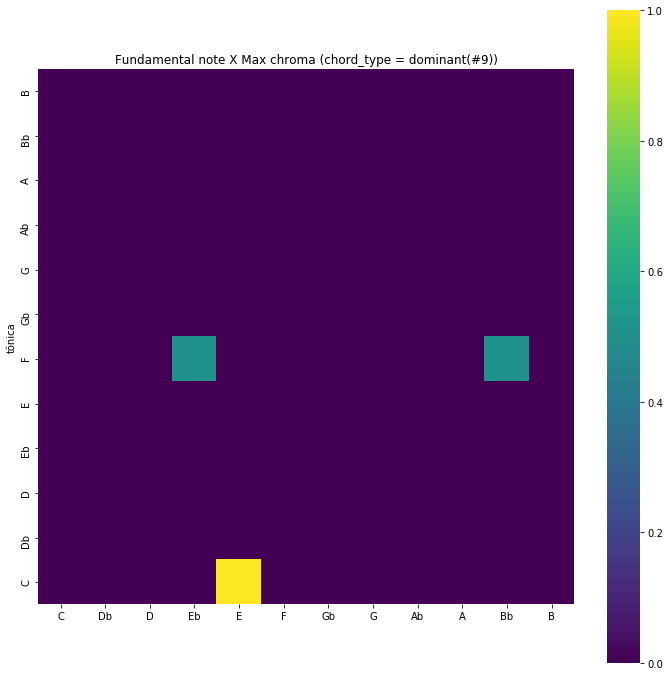

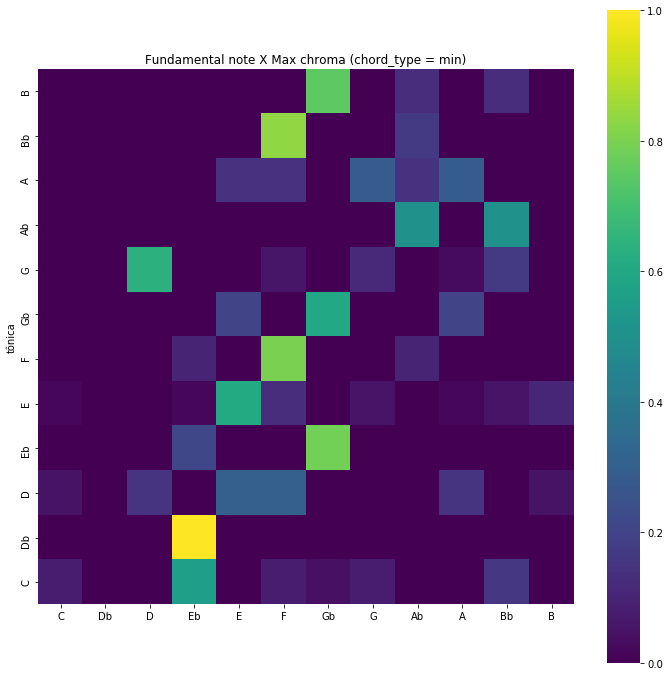

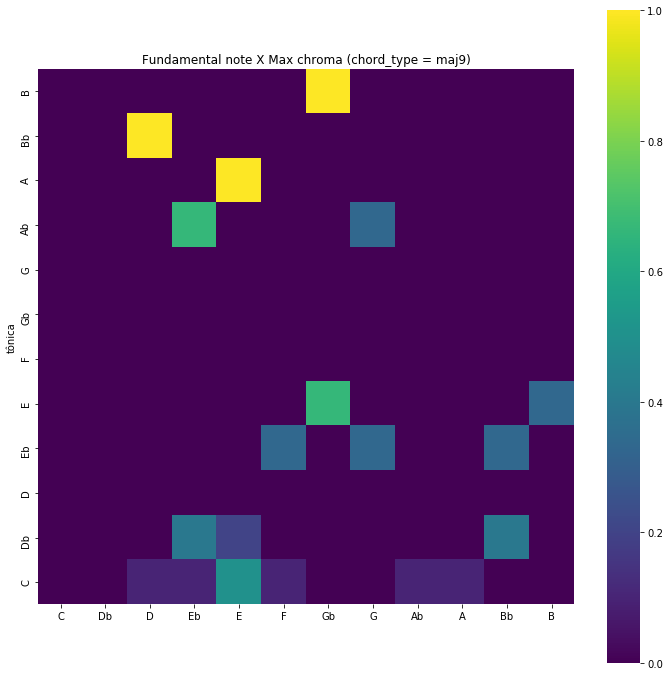

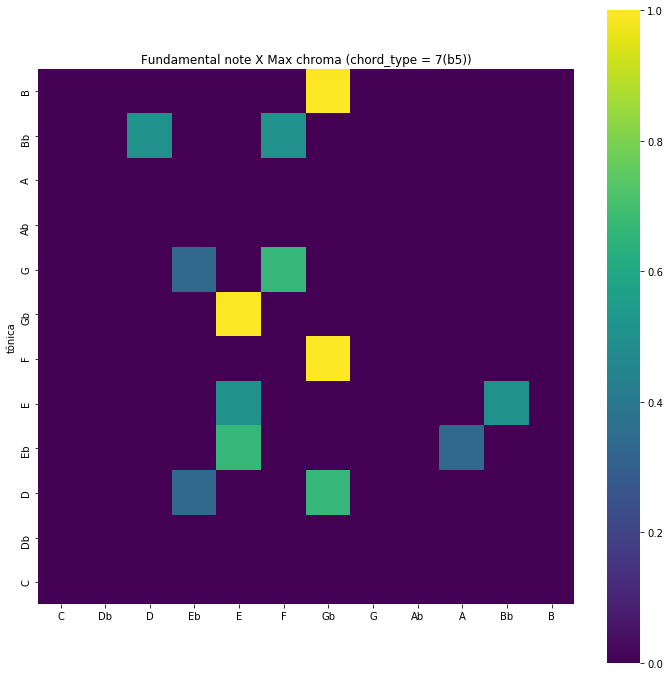

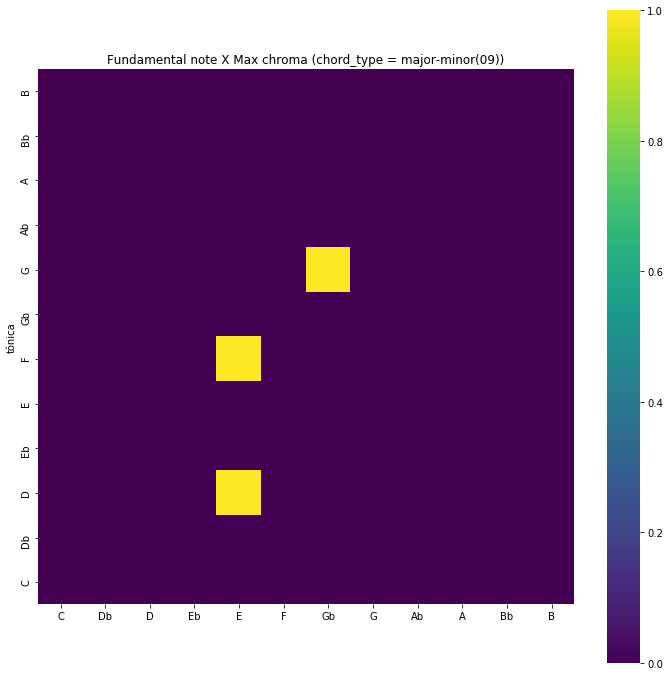

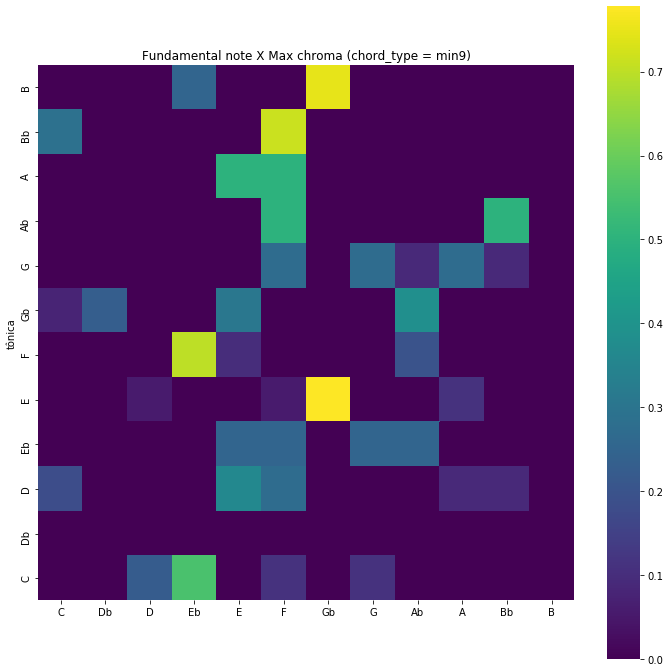

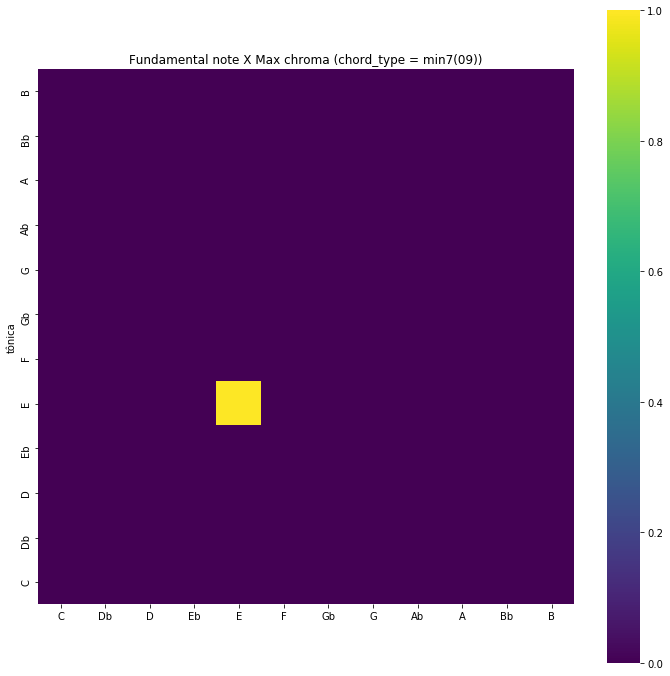

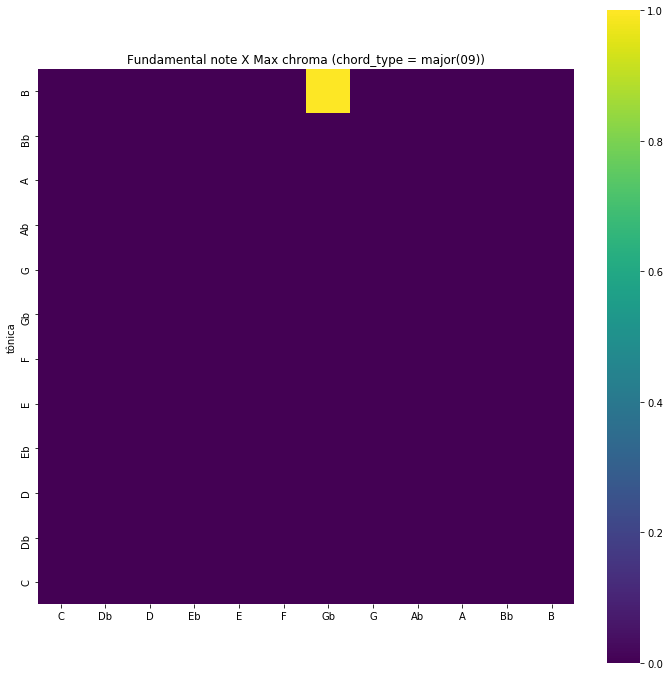

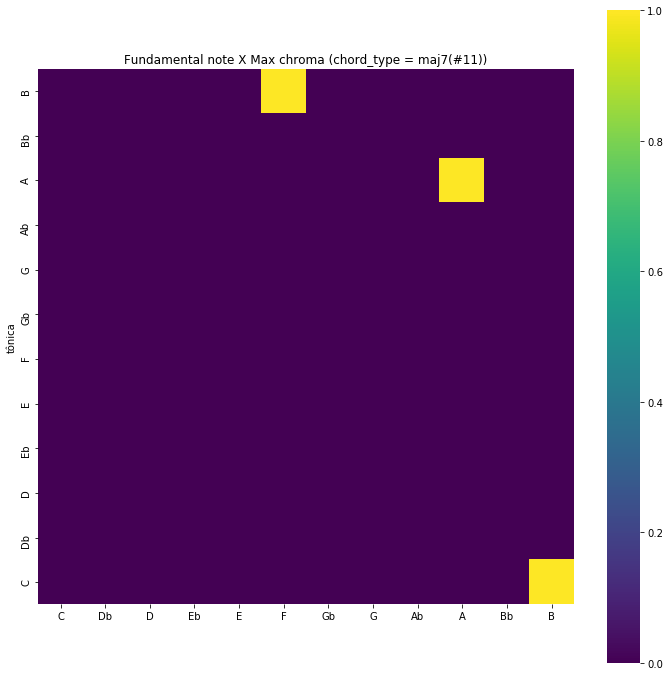

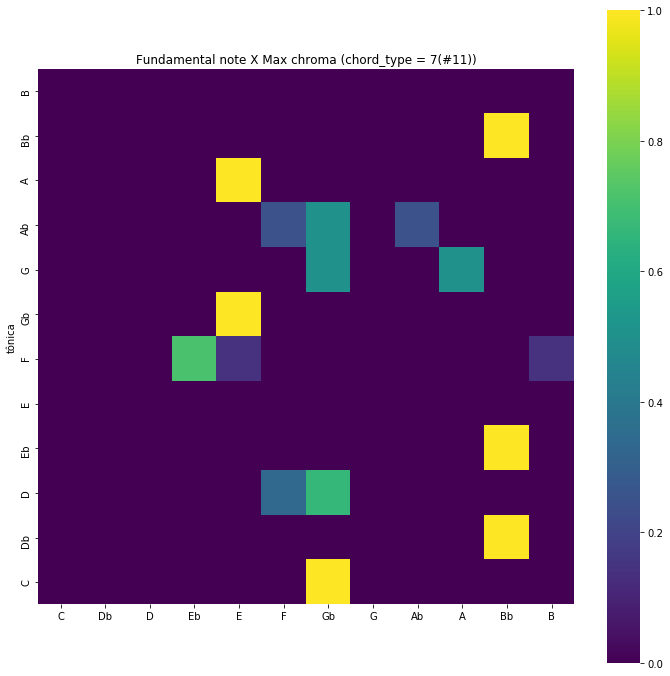

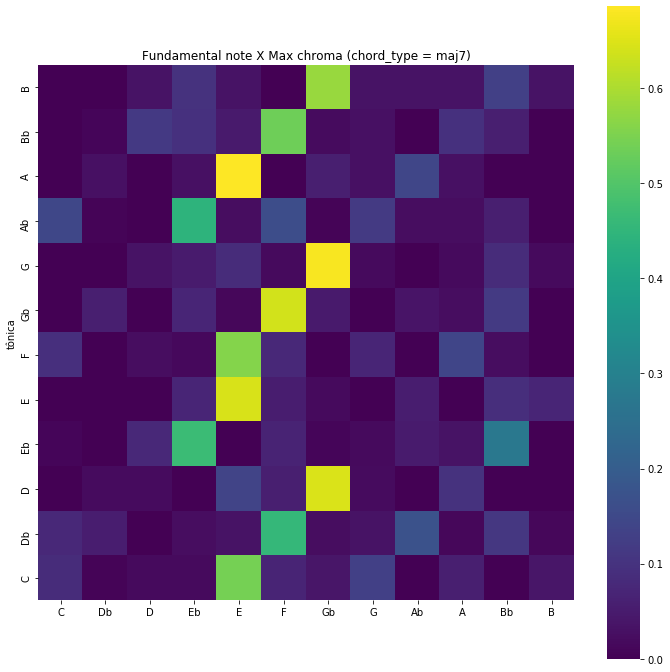

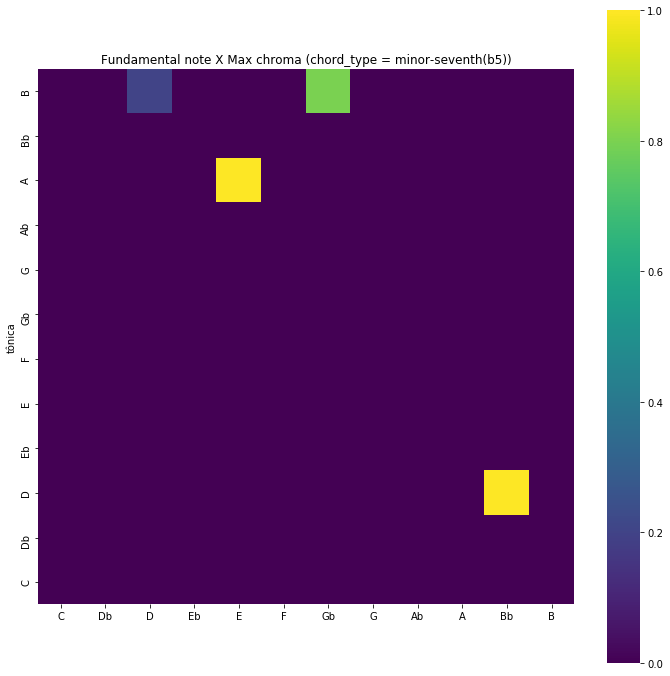

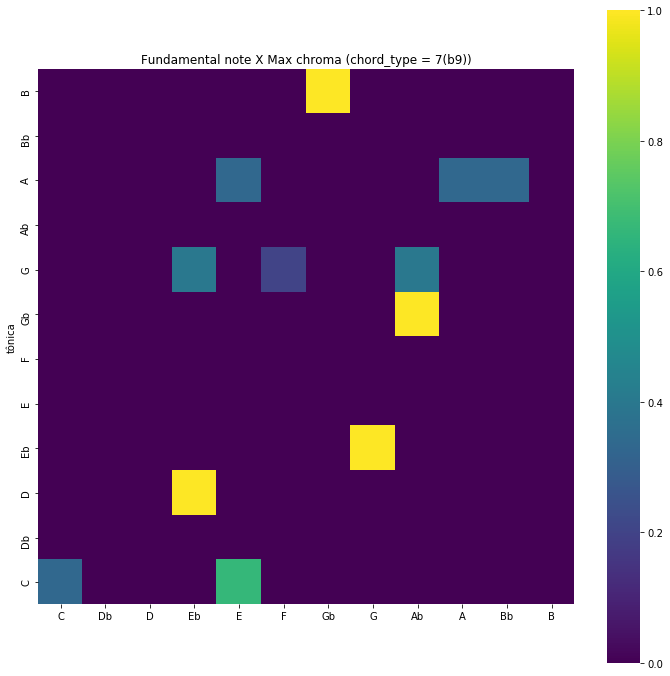

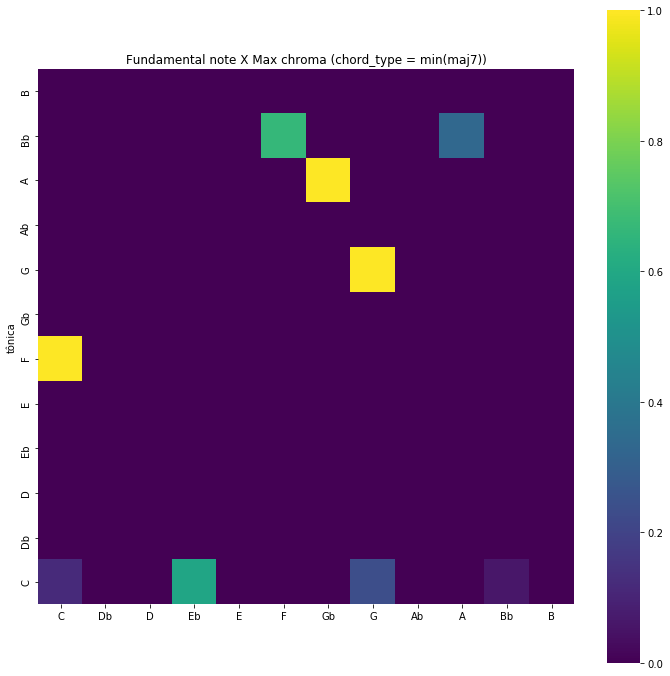

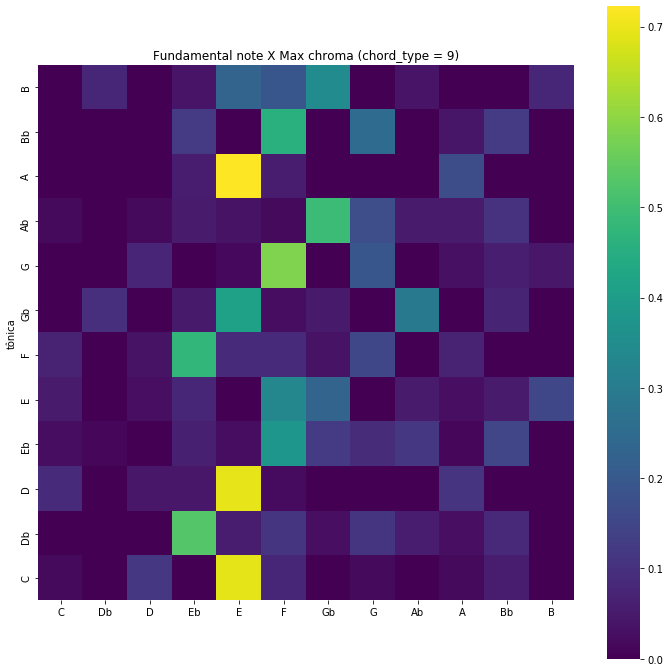

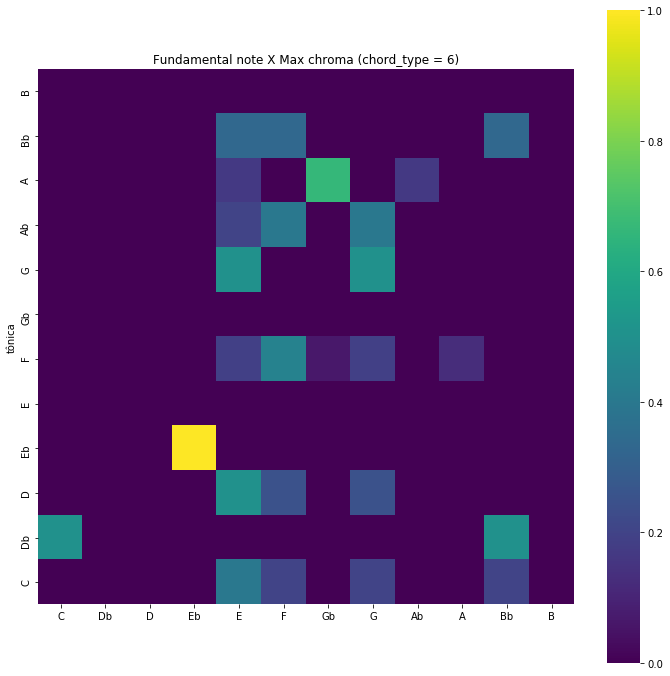

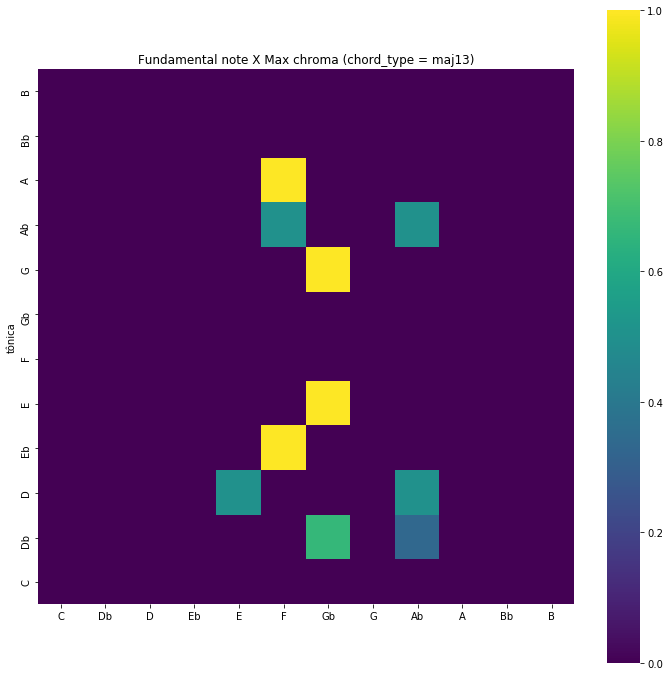

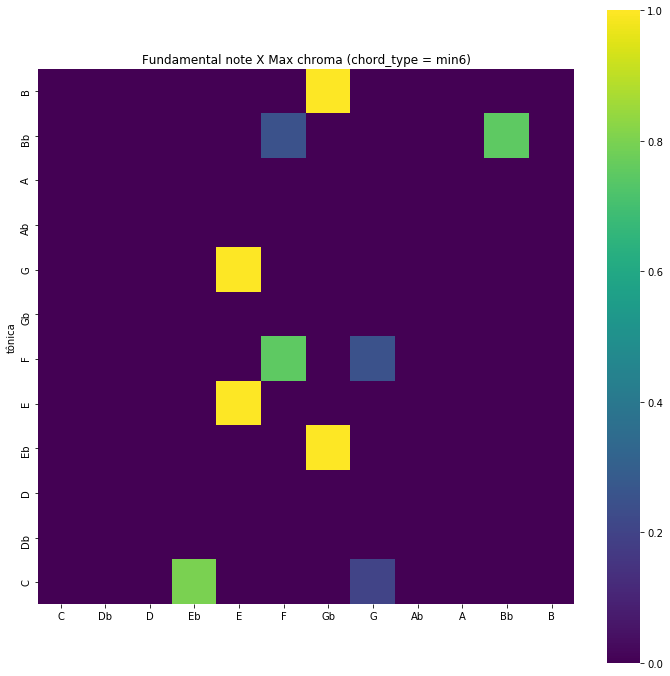

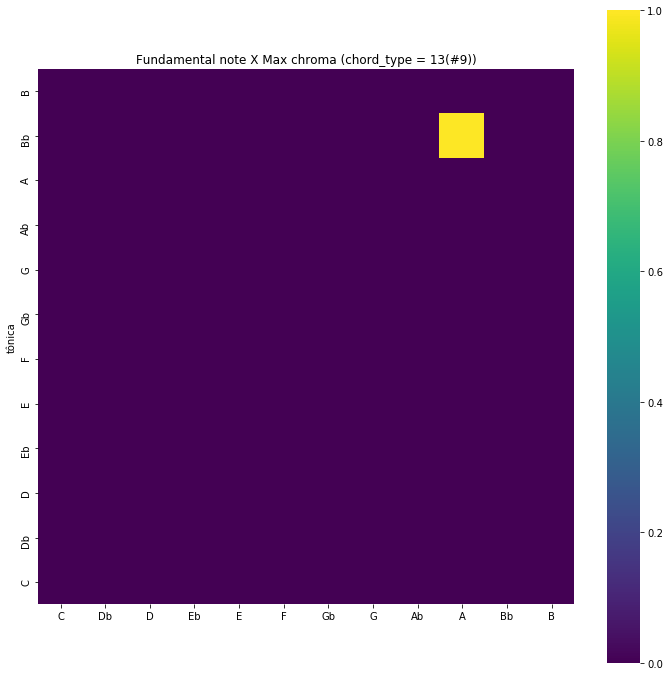

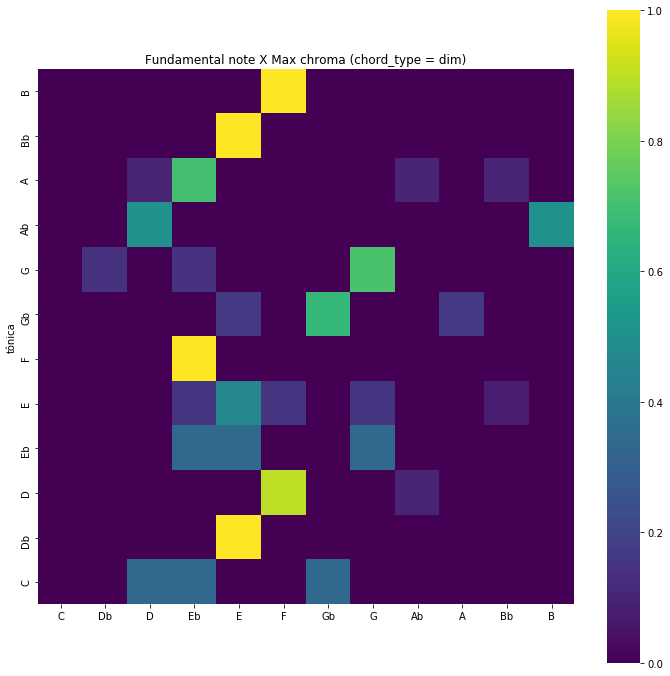

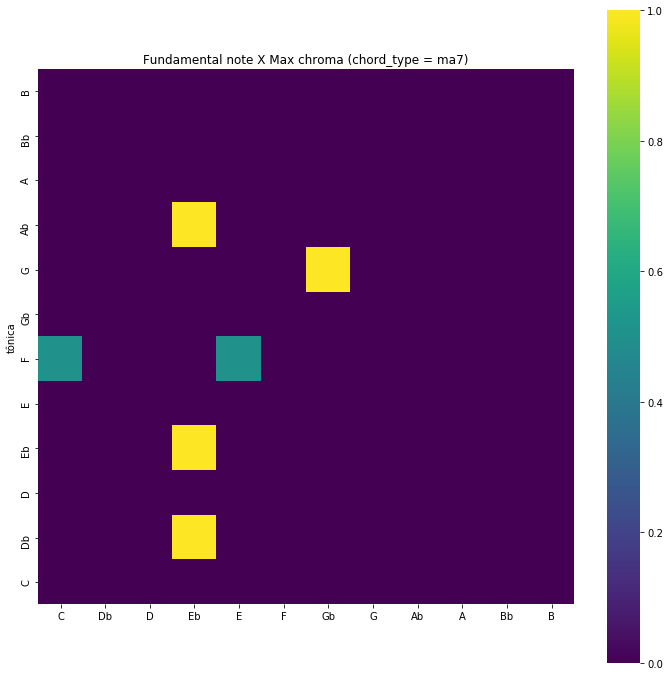

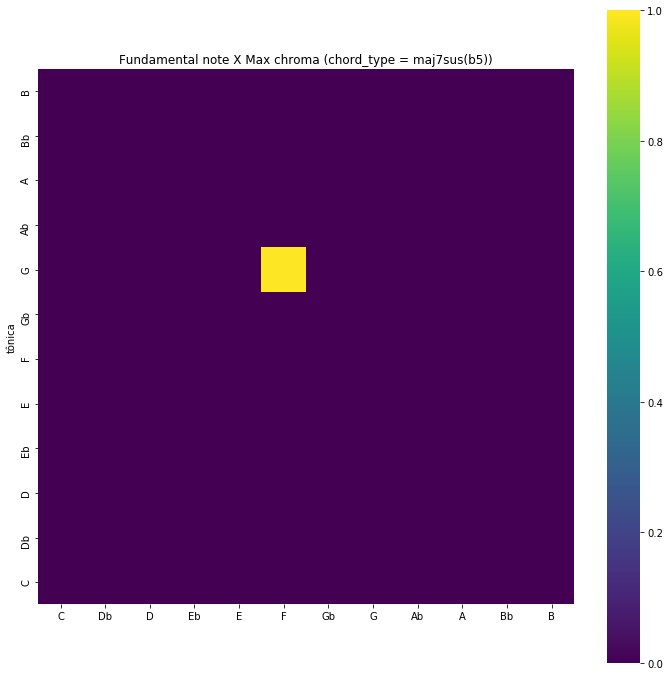

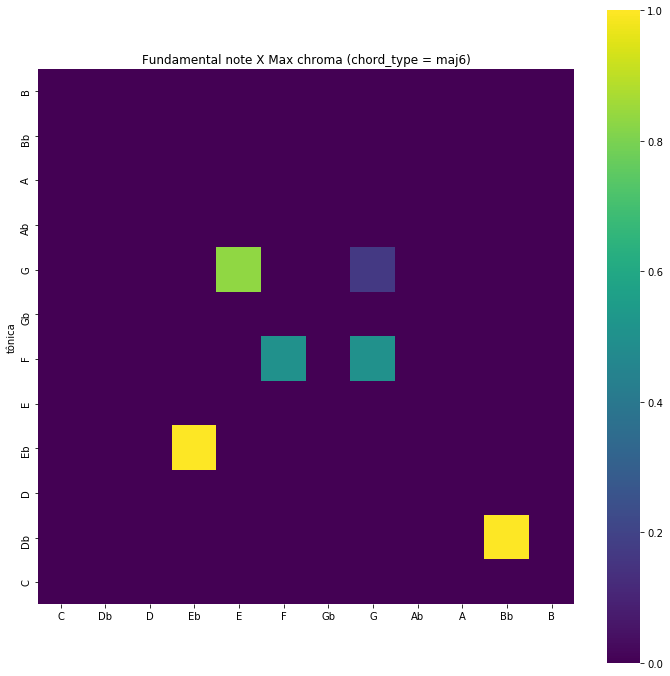

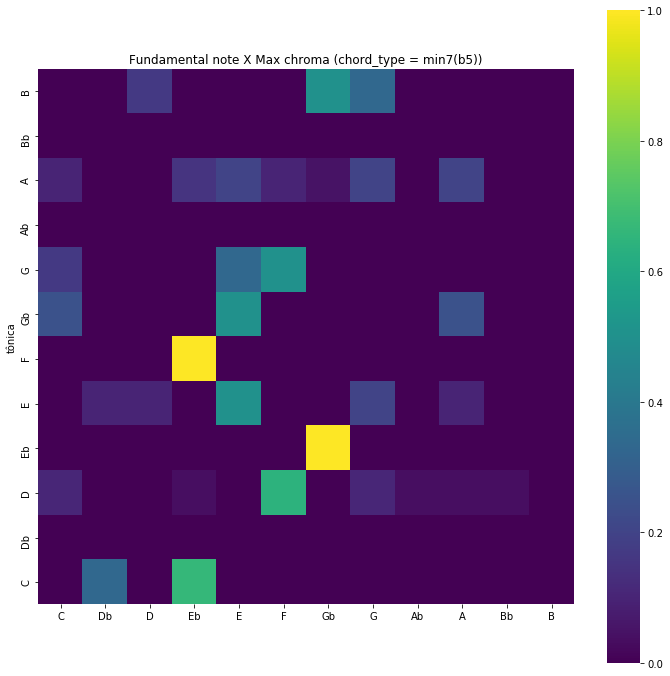

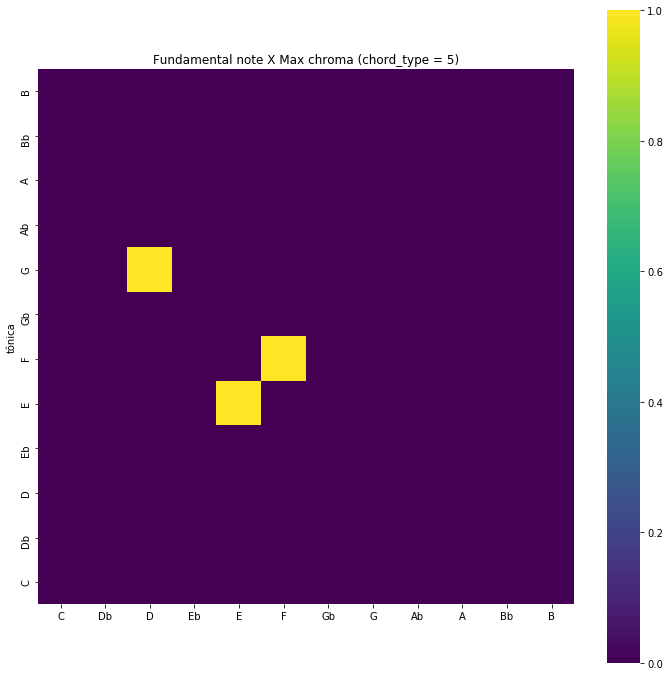

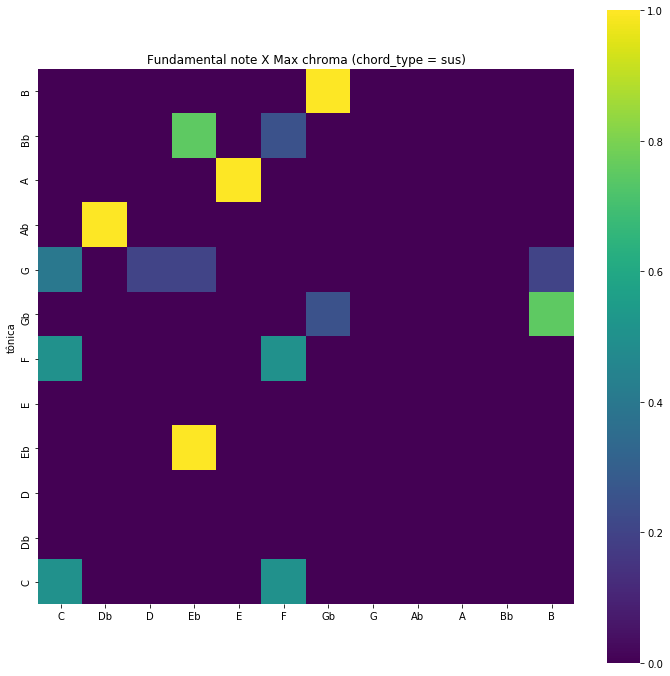

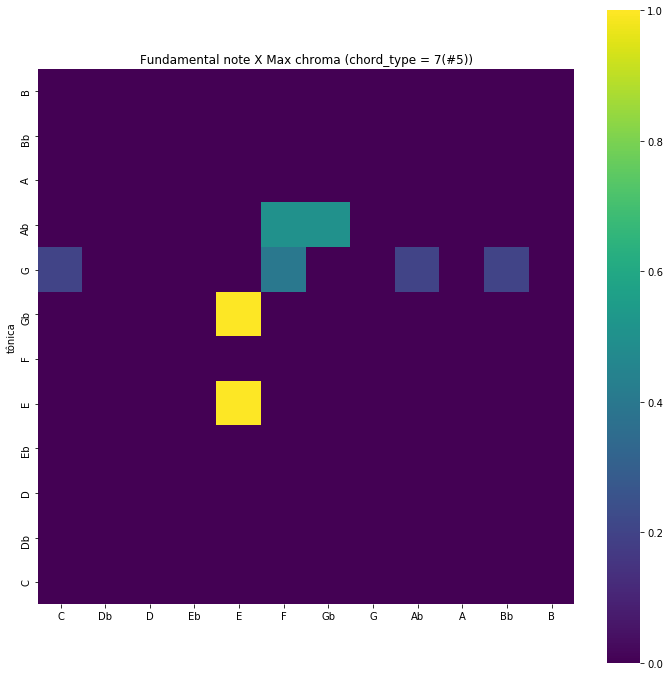

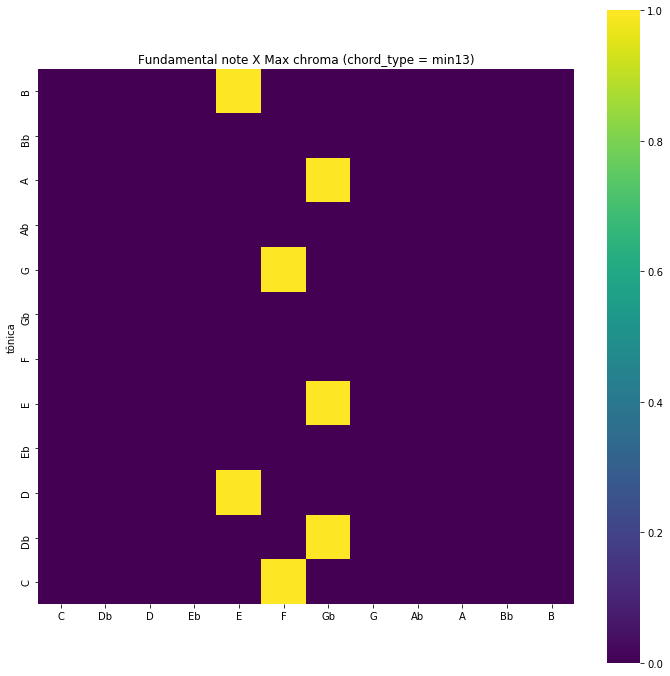

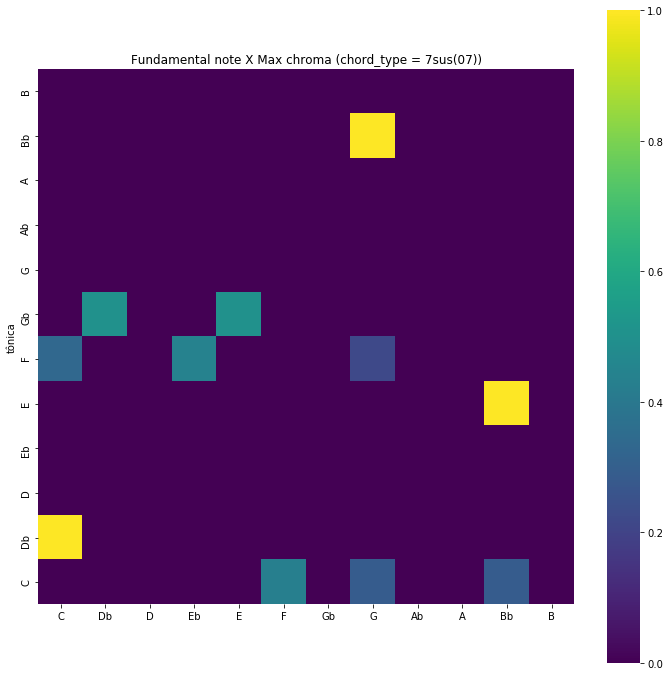

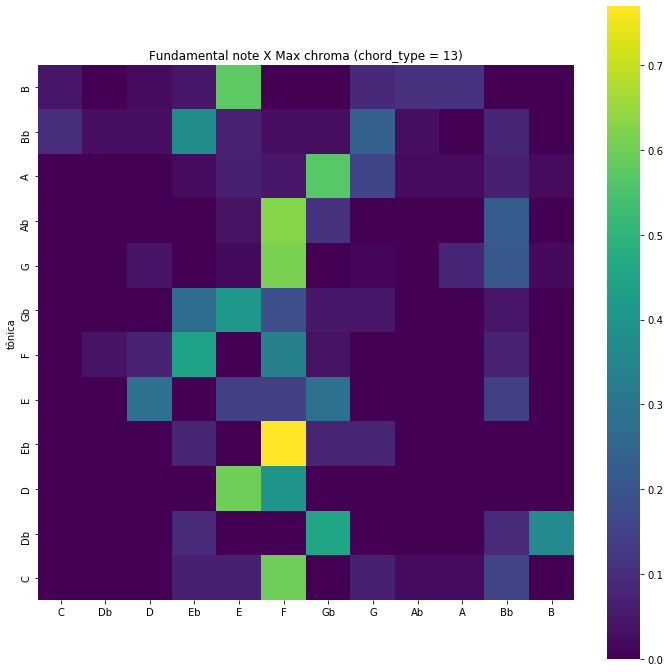

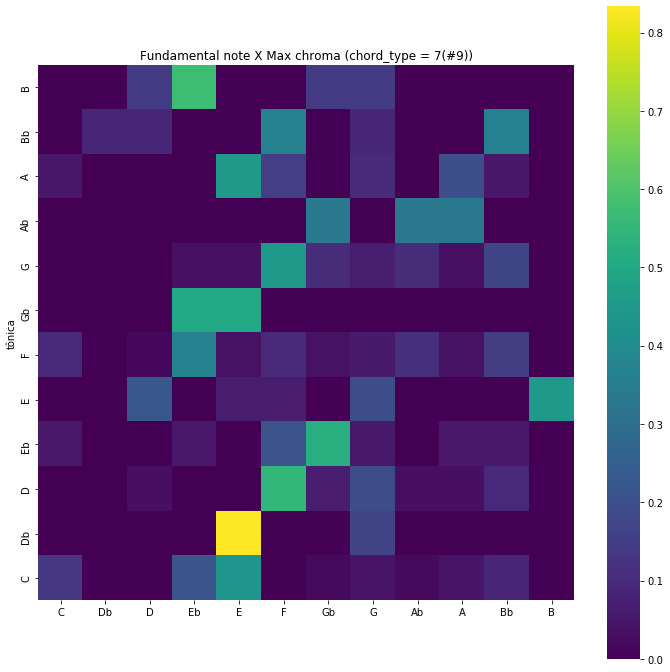

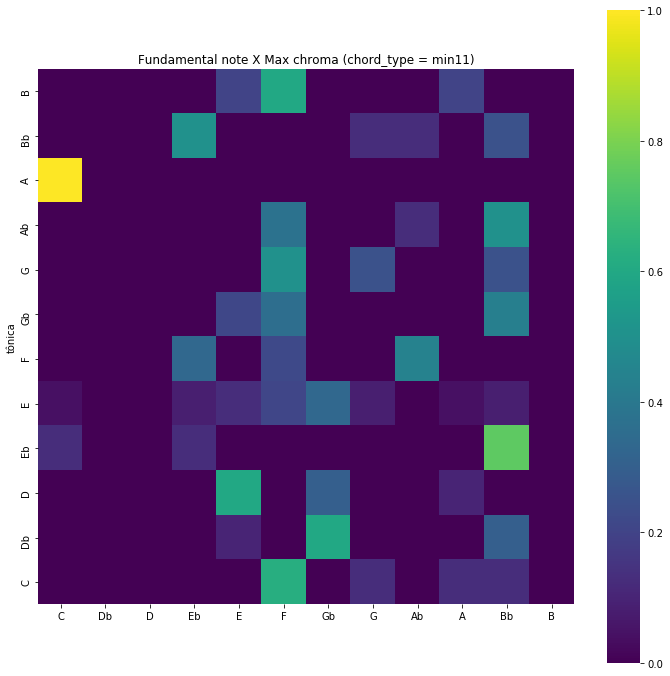

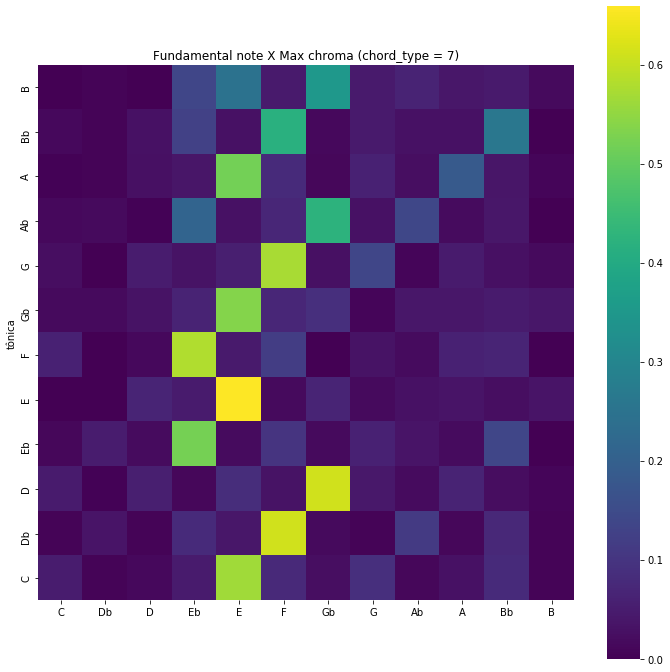

In [60]:
types = list(set(df_model['chord_type']))
for typ in types:

    df_type = df_model[df_model.chord_type == typ]


    df_scatter = pd.DataFrame({'C_max':list(map(func_max, df_type.values[:,:-3])),
                           'tônica':df_type['note_number'].values})

    df_scatter['C_max'] = df_scatter['C_max'].astype(float)
    df_scatter['count'] = 1

    df_count = df_scatter.groupby(['tônica', 'C_max'])[['count']].sum()


    pivot_heatmap = pd.DataFrame(columns=list(range(1,13)), index=list(range(1,13)))
    pivot_heatmap.index.name = 'tônica'
    pivot_heatmap = pivot_heatmap.sort_index(ascending=False)



    for i in df_count.index:
    #     print(int(i[0]), int(i[1]), df_count.loc[i]['aux'])
        pivot_heatmap.at[int(i[0]), int(i[1])] = df_count.loc[i]['count']

    pivot_heatmap = pivot_heatmap.fillna(0)

    pivot_heatmap_norm = pivot_heatmap.copy()

    for i in pivot_heatmap_norm.index:
        soma_i = pivot_heatmap_norm.loc[i].sum()
        pivot_heatmap_norm.loc[i] = (pivot_heatmap_norm.loc[i]/soma_i).values

    pivot_heatmap_norm.fillna(0, inplace=True)
    pivot_heatmap_norm

    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(pivot_heatmap_norm, 
                square=True, 
                cmap='viridis',
                xticklabels=notes, 
                yticklabels=notes_reverse
               )
    
    plt.title('Fundamental note X Max chroma (chord_type = {})'.format(typ))

    plt.savefig('figures/fundamental_x_chroma_max_{}.png'.format(typ), 
                dpi=300)

In [96]:
notes_reverse

['B', 'Bb', 'A', 'Ab', 'G', 'Gb', 'F', 'E', 'Eb', 'D', 'Db', 'C']

In [15]:
df_model.shape

(7155, 14)

## Modeling

In [183]:
all_notes = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']
# all_notes

all_notes_2 = sorted(all_notes) #list(set(df_model['chord_note']))

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X = df_model[notes]
y = df_model['chord_type']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3)

In [186]:
X_train

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
4507,770.351562,155.024918,124.815979,492.520355,197.745621,277.875824,93.724205,270.391693,1279.226440,792.520935,3478.507080,610.619873
3051,481.412231,143.508316,207.958633,758.726074,438.059845,306.196869,1132.788574,407.524658,518.030457,130.059097,63.718021,133.859451
103,277.299286,199.831665,673.244324,491.040558,421.480682,890.877136,243.694382,77.477242,121.445984,535.203918,569.432434,157.329514
4234,498.128998,1830.230957,537.000305,655.103943,2817.079346,813.723877,637.186218,1753.302612,1310.854126,4277.774414,690.592041,288.236725
944,55.714893,143.045517,42.661228,25.973444,84.219933,335.751373,59.448959,18.271208,89.574821,65.708809,278.973572,136.094574
...,...,...,...,...,...,...,...,...,...,...,...,...
5337,1323.862671,410.798920,685.597351,398.949951,1115.292358,255.284973,156.773666,541.542419,362.501343,726.239441,213.213135,572.872375
1066,224.416672,184.134583,808.505859,351.592285,945.414368,285.009613,158.838776,459.037567,117.817383,77.872711,110.427948,616.338684
874,28.756294,57.335327,78.206154,72.336487,224.558334,78.311897,26.412588,85.114540,113.794029,542.104858,84.883049,41.722652
699,48.565845,39.473225,11.381749,43.141384,47.866425,74.042366,29.220642,12.654263,48.480465,52.264019,26.861160,11.439002


In [187]:
X_test

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
4069,2256.023438,787.196228,1866.909302,459.212250,776.707458,3620.118164,882.634521,204.105469,248.282394,1243.672485,259.228058,427.130890
6528,85.836853,21.411943,31.693205,67.073410,159.501831,31.274101,10.765912,42.267738,13.291168,10.681022,5.764663,21.984108
4848,595.684265,225.055771,231.373245,852.405029,431.857330,468.681396,236.764816,232.580704,457.630127,125.509216,98.738068,171.553879
6784,664.498779,1784.560913,406.664154,689.441345,548.360901,1647.055054,333.609894,173.790909,634.173096,466.542755,969.135742,302.900848
7084,521.391907,409.274292,617.231873,307.758881,791.467834,2034.549805,1070.477295,1837.403931,451.842804,729.880188,1079.912231,371.654022
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,214.682938,488.568512,233.716721,291.089813,320.178101,1169.232422,270.723053,134.492996,561.287048,844.137146,3148.254150,608.743286
2237,191.446167,251.497437,149.252228,426.979218,120.396614,155.472946,413.277222,146.918579,155.778961,63.571239,196.937073,93.723656
4023,270.563141,293.822632,783.268066,221.970413,390.314941,108.264381,81.615303,107.859901,70.144508,86.967407,216.575272,1383.164673
4384,222.181168,53.404064,70.523094,41.073639,139.546783,519.350403,100.649117,24.192236,65.380859,157.104080,60.995373,50.353970


Checando divisão em treino e teste:

In [188]:
X_train.shape[0] + X_test.shape[0] == df_model.shape[0]

True

In [189]:
y_train.shape[0] + y_test.shape[0] == df_model.shape[0]

True

#### Balanceando classes

In [190]:
from imblearn.over_sampling import SMOTE

In [191]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train, y_train)

#### Importanto módulos para avaliação do modelo

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import itertools

In [197]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,13))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center"#,
#                  color="white" if cm[i, j] > thresh else "black"
                )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['7', 'min7']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
#     print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
#     print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
#     print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
#     return roc_auc_score(y_true, y_pred)


Logistic Regression

In [193]:
# from sklearn import svm
# from sklearn import model_selection

Classification Report
              precision    recall  f1-score   support

           7       0.62      0.62      0.62      1258
        min7       0.46      0.47      0.47       889

    accuracy                           0.56      2147
   macro avg       0.54      0.54      0.54      2147
weighted avg       0.56      0.56      0.56      2147

Accuracy Score: 0.5561248253376805
Confusion matrix, without normalization
[[775 483]
 [470 419]]


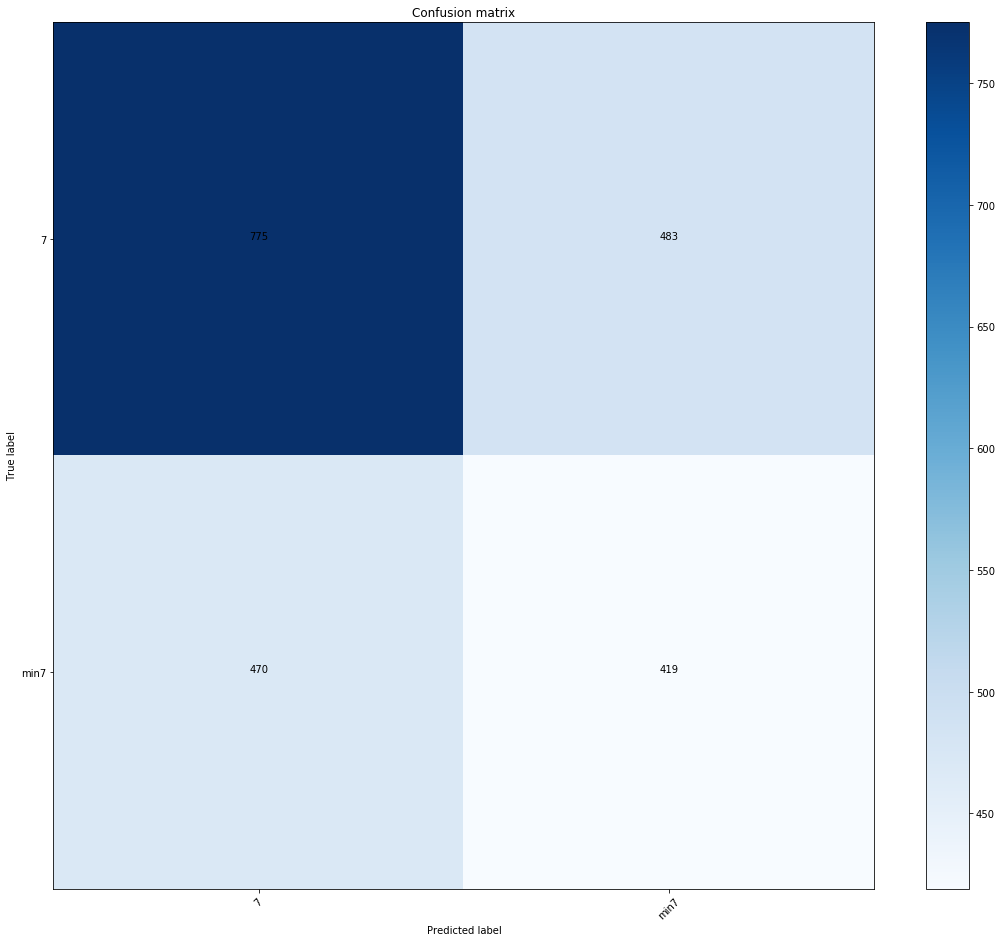

In [198]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            dual=False, 
                            tol=0.001, 
                            C=0.10, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=0, 
                            solver='saga', 
                            max_iter=1000, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=-1).fit(X_train, y_train)

roc_lr = clf_eval(clf_lr, X_test, y_test)

In [200]:
df_model['chord_type'].value_counts()

7       4208
min7    2947
Name: chord_type, dtype: int64

In [201]:
pd.DataFrame(y_train)['chord_type'].value_counts()

7       2950
min7    2950
Name: chord_type, dtype: int64

In [199]:
pd.DataFrame(y_test)['chord_type'].value_counts()

7       1258
min7     889
Name: chord_type, dtype: int64

In [151]:
y_pred = clf_lr.predict(X_test)
clf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[  0   1   0   0   5   0   0 104   3  25   1   0]
 [  0  29   0   0   2   0   0   5  13  70   4   0]
 [  0   1   9   0   2   0   0  31   9  25   1   0]
 [  0   3   0  32  13   0   1  19  16 223  23   0]
 [  0   0   0   1  35   0   0  72   3 149   8   0]
 [  1   0   2   0   3  32   0  36   2 127  18   0]
 [  0   1   0   1   2   0   0  20   5  37   3   0]
 [  0   0   1   0   5   0   0  91   2   9   0   0]
 [  0   4   0   0   3   0   0   3 111  60   3   0]
 [  0   1   0   1   3   0   0  10   4 246   6   0]
 [  2   3   0   2   4   0   0  38   1  61 187   0]
 [  0   2   0   0   1   0   0  37   1  13   4   0]]


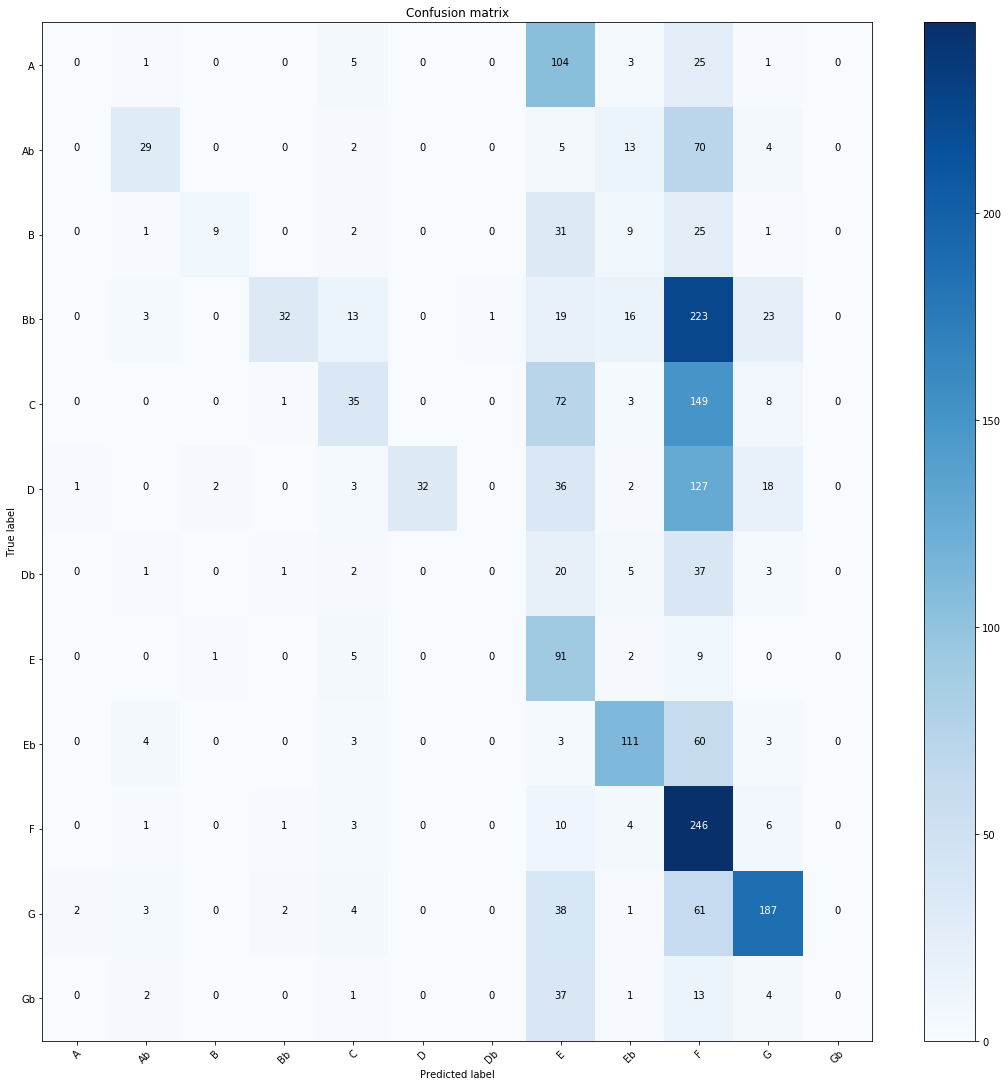

In [152]:
plot_confusion_matrix(clf_matrix, classes=all_notes_2)

In [173]:
clf_matrix_2 = pd.DataFrame(clf_matrix, 
                            columns=all_notes_2, 
                            index=all_notes_2)

clf_matrix_2 = clf_matrix_2[all_notes]
clf_matrix_2 = clf_matrix_2.loc[all_notes]
clf_matrix_2

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
C,35,0,0,3,72,149,0,8,0,0,1,0
Db,2,0,0,5,20,37,0,3,1,0,1,0
D,3,0,32,2,36,127,0,18,0,1,0,2
Eb,3,0,0,111,3,60,0,3,4,0,0,0
E,5,0,0,2,91,9,0,0,0,0,0,1
F,3,0,0,4,10,246,0,6,1,0,1,0
Gb,1,0,0,1,37,13,0,4,2,0,0,0
G,4,0,0,1,38,61,0,187,3,2,2,0
Ab,2,0,0,13,5,70,0,4,29,0,0,0
A,5,0,0,3,104,25,0,1,1,0,0,0


Confusion matrix, without normalization
[[ 35   0   0   3  72 149   0   8   0   0   1   0]
 [  2   0   0   5  20  37   0   3   1   0   1   0]
 [  3   0  32   2  36 127   0  18   0   1   0   2]
 [  3   0   0 111   3  60   0   3   4   0   0   0]
 [  5   0   0   2  91   9   0   0   0   0   0   1]
 [  3   0   0   4  10 246   0   6   1   0   1   0]
 [  1   0   0   1  37  13   0   4   2   0   0   0]
 [  4   0   0   1  38  61   0 187   3   2   2   0]
 [  2   0   0  13   5  70   0   4  29   0   0   0]
 [  5   0   0   3 104  25   0   1   1   0   0   0]
 [ 13   1   0  16  19 223   0  23   3   0  32   0]
 [  2   0   0   9  31  25   0   1   1   0   0   9]]


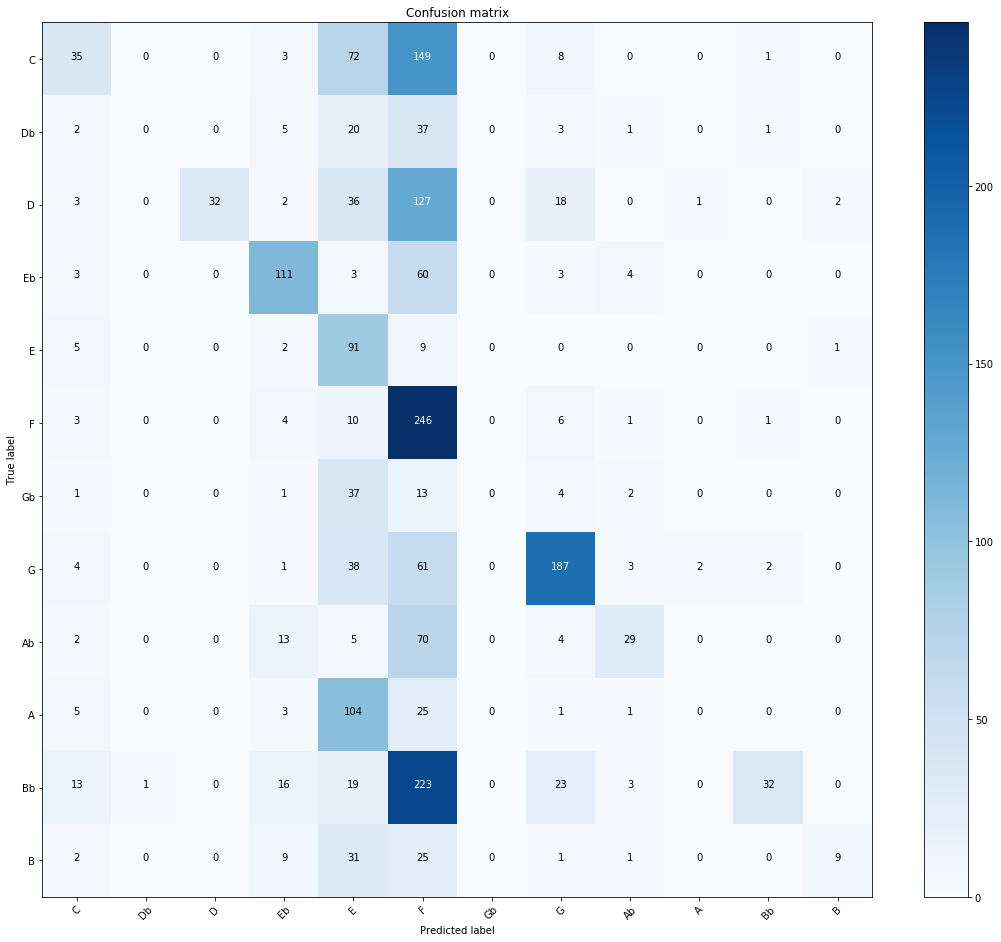

In [176]:
plot_confusion_matrix(clf_matrix_2.values, classes=all_notes)